# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Make blank dataframe
city_weather_metric_df = pd.DataFrame()

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)



622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Make blank dataframe
city_weather_metric_df = pd.DataFrame()

city_weather_metric_df["City"] = cities
city_weather_metric_df["Cloudiness (%)"] = ""
city_weather_metric_df["Country"] = ""
city_weather_metric_df["Date"] = ""
city_weather_metric_df["Humidity (%)"] = ""
city_weather_metric_df["Lat"] = "" 
city_weather_metric_df["Lng"] = ""
city_weather_metric_df["Max Temp (F)"] = ""   
city_weather_metric_df["Wind Speed (mph)"] = "" 

city_weather_metric_df.reset_index()
city_weather_metric_df.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,urulga,,,,,,,,
1,ondjiva,,,,,,,,
2,bredasdorp,,,,,,,,
3,albany,,,,,,,,
4,rantepao,,,,,,,,


In [4]:
# Save config information
##url = "http://api.openweathermap.org/data/2.5/weather?"
#create settings dictionary
settings = {"units": "imperial", "appid": api_key}

for index,row in city_weather_metric_df.iterrows():
    # Build query URL
    ##query_url = url + "appid=" + api_key + "&q=" + row["City"]
    # Get weather data
    ##weather_response = requests.get(query_url)
    ##weather_json = weather_response.json()
    
    try:
        # get current weather of city
        current_weather_city = owm.get_current(row["City"], **settings)
        city_weather_metric_df.loc[index, 'Lat'] = current_weather_city['coord']['lat']
        city_weather_metric_df.loc[index, 'Lng'] = current_weather_city['coord']['lon']
        city_weather_metric_df.loc[index, 'Max Temp (F)'] = current_weather_city['main']['temp_max']
        city_weather_metric_df.loc[index, 'Wind Speed (mph)'] = current_weather_city['wind']['speed']
        city_weather_metric_df.loc[index, 'Humidity (%)'] = current_weather_city['main']['humidity']
        city_weather_metric_df.loc[index, 'Country'] = current_weather_city['sys']['country']
        city_weather_metric_df.loc[index, 'Date'] = current_weather_city['dt']
        city_weather_metric_df.loc[index, 'Cloudiness (%)'] = current_weather_city['clouds']['all']
        current_city = current_weather_city['name']
        print(f'{current_city} ({index}) is being logged')
    
    except:
        print(f'City {index} is not found')
        city_weather_metric_df.drop(index, inplace=True)

city_weather_metric_df.reset_index(drop=True, inplace=True)
city_weather_metric_df.reset_index()
city_weather_metric_df.head(20)
 

City 0 is not found
Ondjiva (1) is being logged
Bredasdorp (2) is being logged
Albany (3) is being logged
Rantepao (4) is being logged
Tezu (5) is being logged
Lorengau (6) is being logged
Mataura (7) is being logged
Nikolskoye (8) is being logged
City 9 is not found
Atuona (10) is being logged
Pangnirtung (11) is being logged
Charters Towers (12) is being logged
Hobart (13) is being logged
Krasnogorodsk (14) is being logged
New Norfolk (15) is being logged
Arlit (16) is being logged
Gandorhun (17) is being logged
City 18 is not found
Hamilton (19) is being logged
Lazaro Cardenas (20) is being logged
Punta Arenas (21) is being logged
Vila Franca do Campo (22) is being logged
Arraial do Cabo (23) is being logged
Norman Wells (24) is being logged
Nelson Bay (25) is being logged
Rikitea (26) is being logged
Pacific Grove (27) is being logged
Alta Gracia (28) is being logged
Carnarvon (29) is being logged
Lake Havasu City (30) is being logged
Buncrana (31) is being logged
Berlevag (32) is 

Tasiilaq (272) is being logged
Hunchun (273) is being logged
Viedma (274) is being logged
Sitka (275) is being logged
Saint Marys (276) is being logged
Sao Miguel do Iguacu (277) is being logged
Flin Flon (278) is being logged
Ligayan (279) is being logged
Kloulklubed (280) is being logged
Algiers (281) is being logged
Kudahuvadhoo (282) is being logged
Salalah (283) is being logged
Hervey Bay (284) is being logged
Upernavik (285) is being logged
Buchanan (286) is being logged
Nanakuli (287) is being logged
Haines Junction (288) is being logged
Umkomaas (289) is being logged
Sibolga (290) is being logged
Guarapari (291) is being logged
Corinto (292) is being logged
Mizdah (293) is being logged
City 294 is not found
Sarangani (295) is being logged
Pisco (296) is being logged
Cabinda (297) is being logged
Hirara (298) is being logged
Kaitangata (299) is being logged
Ust-Kuyga (300) is being logged
Altay (301) is being logged
Katsuura (302) is being logged
Mollendo (303) is being logged
B

Manicore (540) is being logged
Kidal (541) is being logged
Dergachi (542) is being logged
West Bay (543) is being logged
Lata (544) is being logged
Pasni (545) is being logged
Tongzi (546) is being logged
Villa Constitucion (547) is being logged
Palana (548) is being logged
San Juan (549) is being logged
La Ronge (550) is being logged
Quesnel (551) is being logged
Lakes Entrance (552) is being logged
Praia da Vitoria (553) is being logged
Sangar (554) is being logged
City 555 is not found
Jumla (556) is being logged
Catabola (557) is being logged
Talcahuano (558) is being logged
Tubuala (559) is being logged
La Paz (560) is being logged
Tsumeb (561) is being logged
Kondopoga (562) is being logged
Khuzhir (563) is being logged
Lavrentiya (564) is being logged
Chapais (565) is being logged
Vendome (566) is being logged
City 567 is not found
Grakhovo (568) is being logged
Ushibuka (569) is being logged
Sabha (570) is being logged
Labuhan (571) is being logged
Mount Gambier (572) is being 

,City,Cloudiness (%),Country,Date,Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,ondjiva,52,AO,1570071189,20,-17.07,15.73,60.14,5.08
1,bredasdorp,36,ZA,1570071145,87,-34.53,20.04,51.8,5.82
2,albany,90,US,1570070988,71,42.65,-73.75,54,8.05
3,rantepao,1,ID,1570071189,52,-2.97,119.9,75.64,5.55
4,tezu,85,IN,1570071189,79,27.93,96.16,76.59,0.31
5,lorengau,87,PG,1570071190,75,-2.02,147.27,82.91,2.28
6,mataura,86,NZ,1570071061,88,-46.19,168.86,48,8.99
7,nikolskoye,90,RU,1570071190,93,59.7,30.79,42.01,6.71
8,atuona,24,PF,1570071191,72,-9.8,-139.03,80.09,8.16
9,pangnirtung,0,CA,1570071191,70,66.15,-65.72,23.26,3.91


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
len(city_weather_metric_df.index)

560

In [6]:
city_weather_metric_df.to_csv("output_data/cities.csv")

In [7]:
### Plotting the Data
#* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

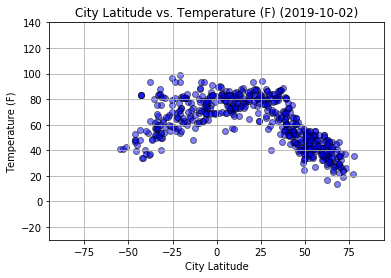

<Figure size 432x288 with 0 Axes>

In [8]:
x_axis = list(city_weather_metric_df['Lat'])

now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
                    
max_temp = list(city_weather_metric_df['Max Temp (F)'])

plt.xlim(-95, 95)
plt.ylim(-30, 140)

plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")

plt.title(f"City Latitude vs. Temperature (F) ({date})")

plt.grid()

plt.scatter(x_axis, max_temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.show()

plt.savefig('output_data/lat_temp_scat_plot.png')

#### Latitude vs. Humidity Plot

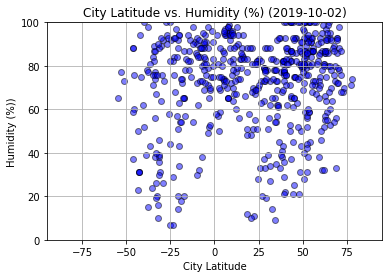

<Figure size 432x288 with 0 Axes>

In [9]:
humidity = list(city_weather_metric_df['Humidity (%)'])

plt.xlim(-95, 95)
plt.ylim(0, 100)

plt.xlabel("City Latitude")
plt.ylabel("Humidity (%))")

plt.title(f"City Latitude vs. Humidity (%) ({date})")

plt.grid()

plt.scatter(x_axis, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.show()

plt.savefig('output_data/lat_humidity_scat_plot.png')

#### Latitude vs. Cloudiness Plot

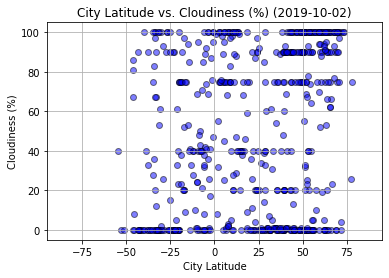

<Figure size 432x288 with 0 Axes>

In [10]:
cloudiness = list(city_weather_metric_df['Cloudiness (%)'])

plt.xlim(-95, 95)
plt.ylim(-5, 105)

plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")

plt.title(f"City Latitude vs. Cloudiness (%) ({date})")

plt.grid()

plt.scatter(x_axis, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.show()

plt.savefig('output_data/lat_temp_cloud_plot.png')

#### Latitude vs. Wind Speed Plot

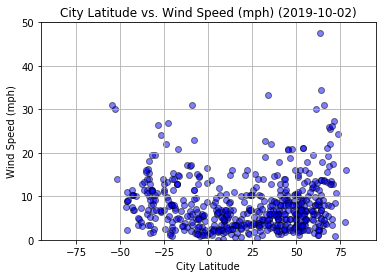

In [11]:
wind_speed = list(city_weather_metric_df['Wind Speed (mph)'])

plt.xlim(-95, 95)
plt.ylim(0, 50)

plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")

plt.title(f"City Latitude vs. Wind Speed (mph) ({date})")

plt.grid()

plt.scatter(x_axis, wind_speed, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)

plt.savefig('output_data/lat_wind_scat_plot.png')